In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

In [6]:
df= pd.read_csv("../raw_analyst_ratings.csv")

Descriptive Statistics:

In [7]:
print("columns:")
print(df.columns)
"\n"
print("shape:")
print(df.shape)
"\n"
print("the first raws of data:")
print(df.head())
"\n"
print("description:")
print(df.describe())
"\n"
print("the information:")
print(df.info())
"\n"
print("check:")
print(df.isnull().sum())
"\n"
print("   :")
print(df.isnull().values.sum())

columns:
Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')
shape:
(1407328, 6)
the first raws of data:
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   



In [8]:
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [9]:
# Calculate headline lengths
df['headline_length'] = df['headline'].str.len()
# Descriptive statistics for headline lengths
headline_length_stats = df['headline_length'].describe()
print("Descriptive Statistics for Headline Length:")
print(headline_length_stats)

Descriptive Statistics for Headline Length:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [11]:
# Articles per publisher
articles_per_publisher = df['publisher'].value_counts()
print("\nArticles per Publisher:")
print(articles_per_publisher)


Articles per Publisher:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
Matthew Ely               1
Frank Ochoa               1
Jeremie Capron            1
Marvin Dumont             1
Igor Gonta                1
Name: count, Length: 1034, dtype: int64


In [12]:
# Summary statistics for articles per publisher
publisher_stats = articles_per_publisher.describe()
print("\nDescriptive Statistics for Articles per Publisher:")
print(publisher_stats)


Descriptive Statistics for Articles per Publisher:
count      1034.000000
mean       1361.052224
std       11501.954263
min           1.000000
25%           3.000000
50%          11.000000
75%          93.500000
max      228373.000000
Name: count, dtype: float64


In [13]:
# Analyze publication dates
df['date'] = pd.to_datetime(df['date'], errors='coerce')
articles_per_date = df['date'].dt.date.value_counts().sort_index()
print("\nTotal Articles Published:", articles_per_date.sum())
print("\nArticles Published Per Day:")
print(articles_per_date)


Total Articles Published: 55987

Articles Published Per Day:
date
2011-04-27      1
2011-04-28      2
2011-04-29      2
2011-04-30      1
2011-05-01      1
             ... 
2020-06-07     25
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
Name: count, Length: 2528, dtype: int64


In [12]:
# Date range
date_range = df['date'].min(), df['date'].max()
print("\nDate Range:", date_range)


Date Range: (Timestamp('2011-04-27 21:01:48-0400', tz='UTC-04:00'), Timestamp('2020-06-11 17:12:35-0400', tz='UTC-04:00'))


In [9]:
# Peak publication days
peak_days = articles_per_date.nlargest(5)
print("\nPeak Publication Days:")
print(peak_days)


Peak Publication Days:
date
2020-03-12    973
2020-06-05    932
2020-06-10    806
2020-06-09    804
2020-06-08    765
Name: count, dtype: int64


In [13]:
articles_per_date = df['date'].dt.date.value_counts().sort_index()
articles_per_date_df = articles_per_date.reset_index()
articles_per_date_df.columns = ['date', 'count']
articles_per_date_df['year'] = pd.to_datetime(articles_per_date_df['date']).dt.year
articles_per_year = articles_per_date_df.groupby('year')['count'].sum()
print("\nArticles Published Per Year:")
print(articles_per_year)


Articles Published Per Year:
year
2011      760
2012     1187
2013     1240
2014     1189
2015     3695
2016     4223
2017     3581
2018     5395
2019     6325
2020    28392
Name: count, dtype: int64


In [14]:
df["headline"]

0                    Stocks That Hit 52-Week Highs On Friday
1                 Stocks That Hit 52-Week Highs On Wednesday
2                              71 Biggest Movers From Friday
3               46 Stocks Moving In Friday's Mid-Day Session
4          B of A Securities Maintains Neutral on Agilent...
                                 ...                        
1407323               Top Narrow Based Indexes For August 29
1407324    Recap: Wednesday's Top Percentage Gainers and ...
1407325    UPDATE: Oppenheimer Color on China Zenix Auto ...
1407326    Oppenheimer Initiates China Zenix At Outperfor...
1407327    China Zenix Auto International Opens For Tradi...
Name: headline, Length: 1407328, dtype: object

In [15]:
A=df["publisher"].value_counts()
A=A[A>1000]
A

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
BenzingaStaffT         1117
Benzinga Newdesk       1110
The Ticker Tape        1088
Tim Parker             1062
Brad Hammond           1044
Name: count, Length: 85, dtype: int64

Text Analysis(Topic Modeling):

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['headline'])
common_words = X.sum(axis=0).A1
words = vectorizer.get_feature_names_out()
word_counts = pd.DataFrame({'keyword': words, 'count': common_words})
sorted_words = word_counts.sort_values(by='count', ascending=False)
print(sorted_words.head(10))

         keyword   count
104259        vs  162099
93662     stocks  161776
40857        est  140604
40388        eps  128897
63981     market  120558
89240     shares  114313
83568    reports  108710
101800    update   91723
37999   earnings   87399
86676      sales   79645


Time Series Analysis:

In [19]:
# Count articles published on each date
articles_per_date = df['date'].dt.date.value_counts().sort_index()
# Convert to DataFrame for time series analysis
articles_per_date_df = articles_per_date.reset_index()
articles_per_date_df.columns = ['date', 'count']
articles_per_date_df['date'] = pd.to_datetime(articles_per_date_df['date'])

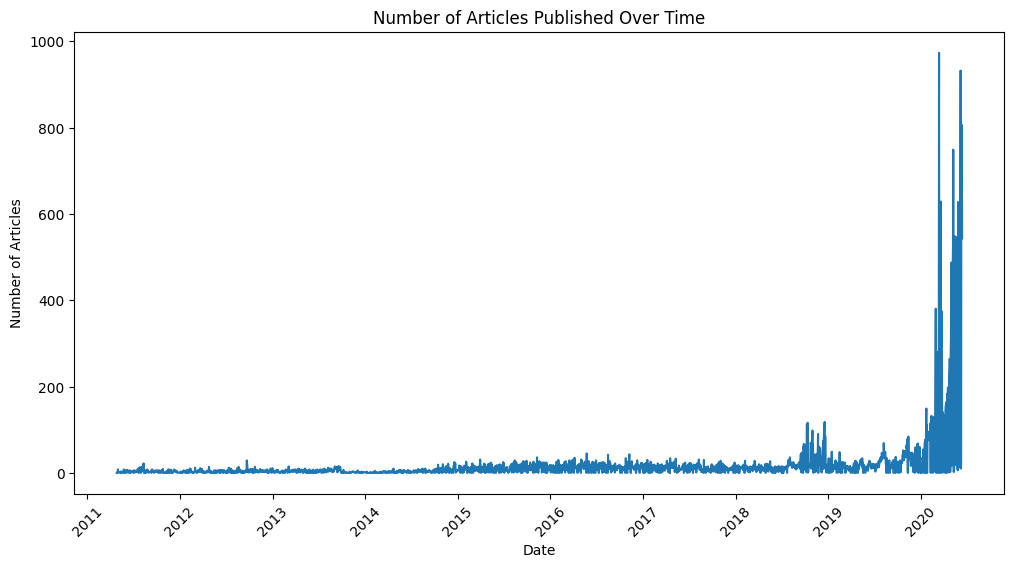

In [20]:
# Plotting the publication frequency over time
plt.figure(figsize=(12, 6))
plt.plot(articles_per_date_df['date'], articles_per_date_df['count'])
plt.title('Number of Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

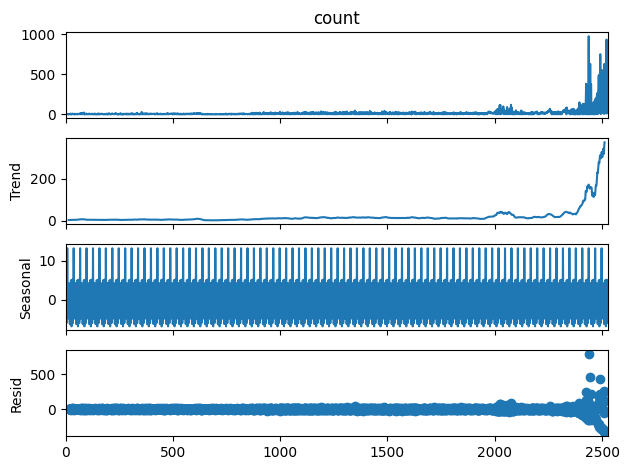

In [21]:
# Time Series Decomposition
decomposition = seasonal_decompose(articles_per_date_df['count'], model='additive', period=30)
decomposition.plot()
plt.show()

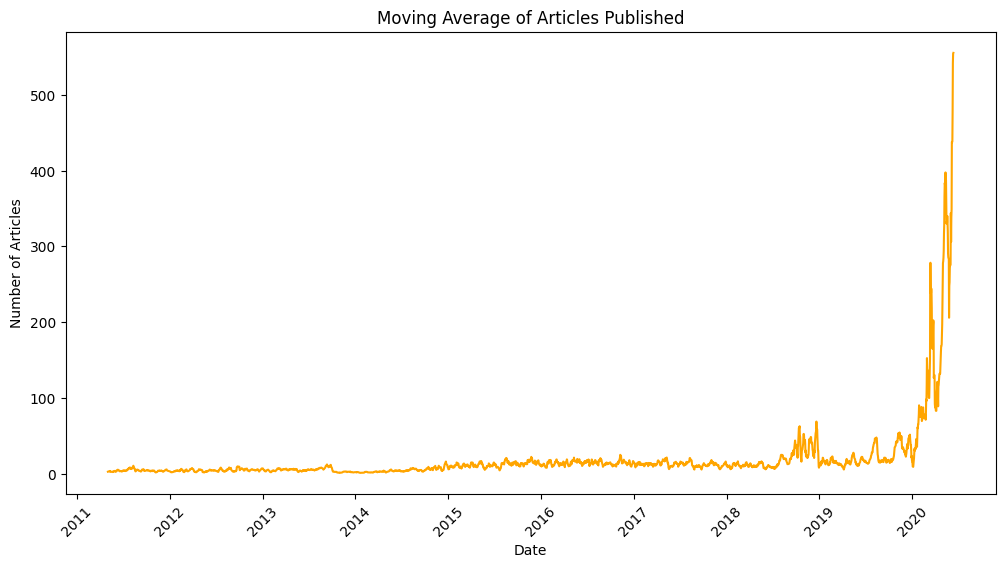

In [22]:
# Moving Average
articles_per_date_df['moving_average'] = articles_per_date_df['count'].rolling(window=7).mean()
plt.figure(figsize=(12, 6))
plt.plot(articles_per_date_df['date'], articles_per_date_df['moving_average'], color='orange')
plt.title('Moving Average of Articles Published')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

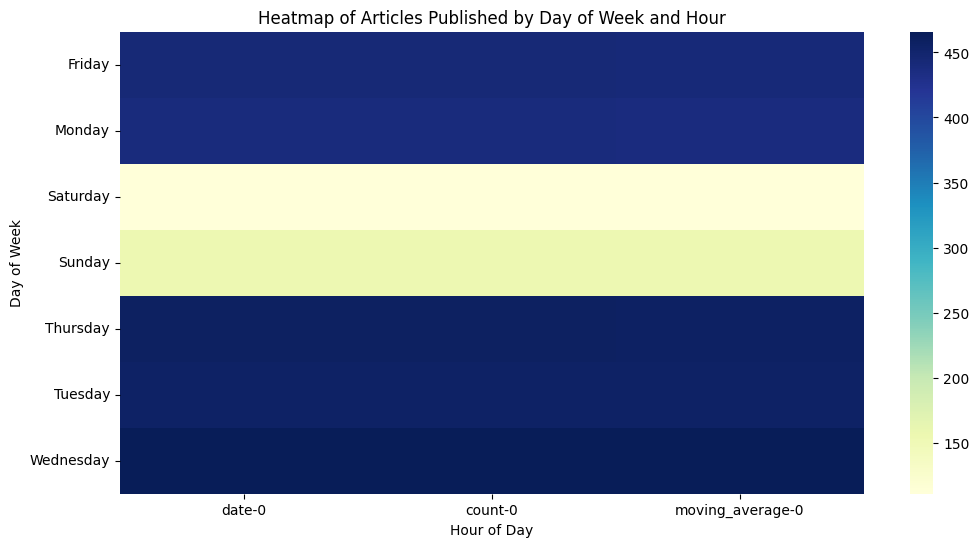

In [24]:
# Heatmap of Articles Published by Day of Week and Hour
articles_per_date_df['day_of_week'] = articles_per_date_df['date'].dt.day_name()
articles_per_date_df['hour'] = articles_per_date_df['date'].dt.hour
heatmap_data = articles_per_date_df.groupby(['day_of_week', 'hour']).count().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Heatmap of Articles Published by Day of Week and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

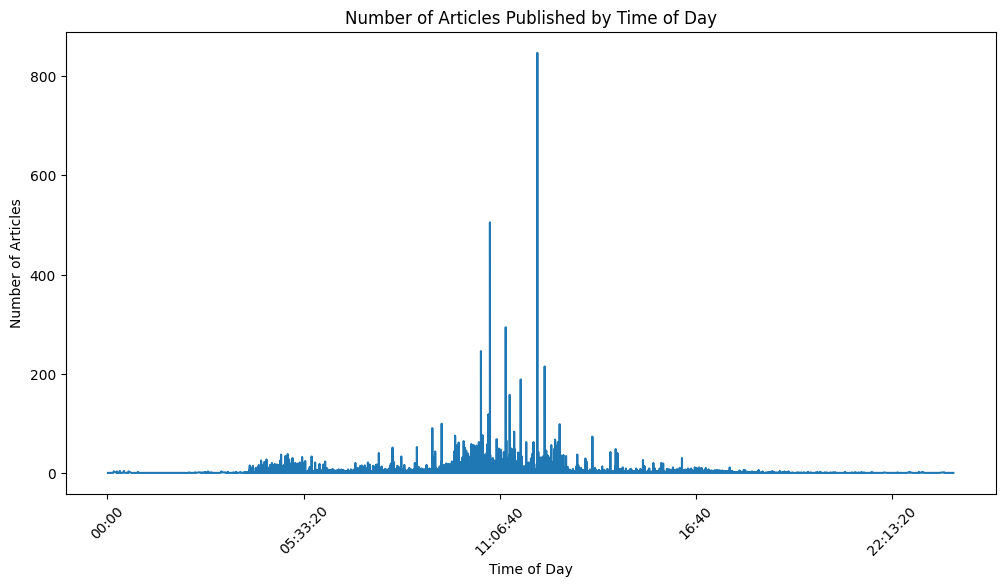

In [25]:
# Analysis of publishing times
df['time'] = df['date'].dt.time
articles_per_time = df['time'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
articles_per_time.plot()
plt.title('Number of Articles Published by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

Publisher Analysis:

In [26]:
# Count articles per publisher
articles_per_publisher = df['publisher'].value_counts()
print("\nArticles per Publisher:\n")
print(articles_per_publisher)


Articles per Publisher:

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
Matthew Ely               1
Frank Ochoa               1
Jeremie Capron            1
Marvin Dumont             1
Igor Gonta                1
Name: count, Length: 1034, dtype: int64


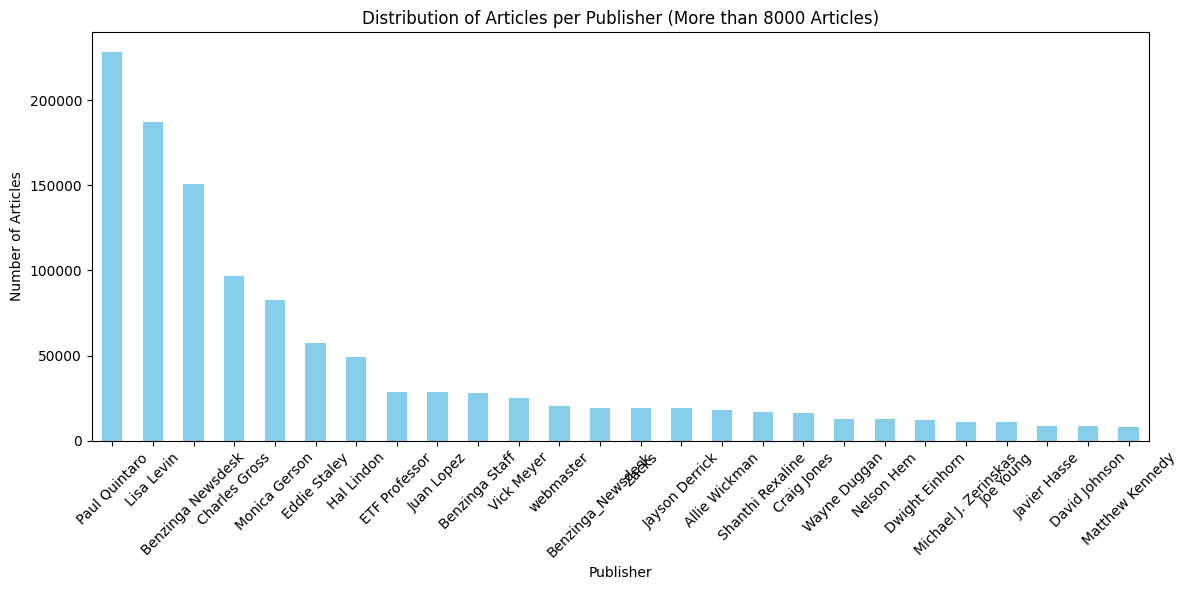

In [27]:
# Count articles per publisher
articles_per_publisher = df['publisher'].value_counts()
# Filter publishers with more than 1000 articles
filtered_publishers = articles_per_publisher[articles_per_publisher > 8000]
# Plotting
plt.figure(figsize=(12, 6))
filtered_publishers.plot(kind='bar', color='skyblue')
plt.title('Distribution of Articles per Publisher (More than 8000 Articles)')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

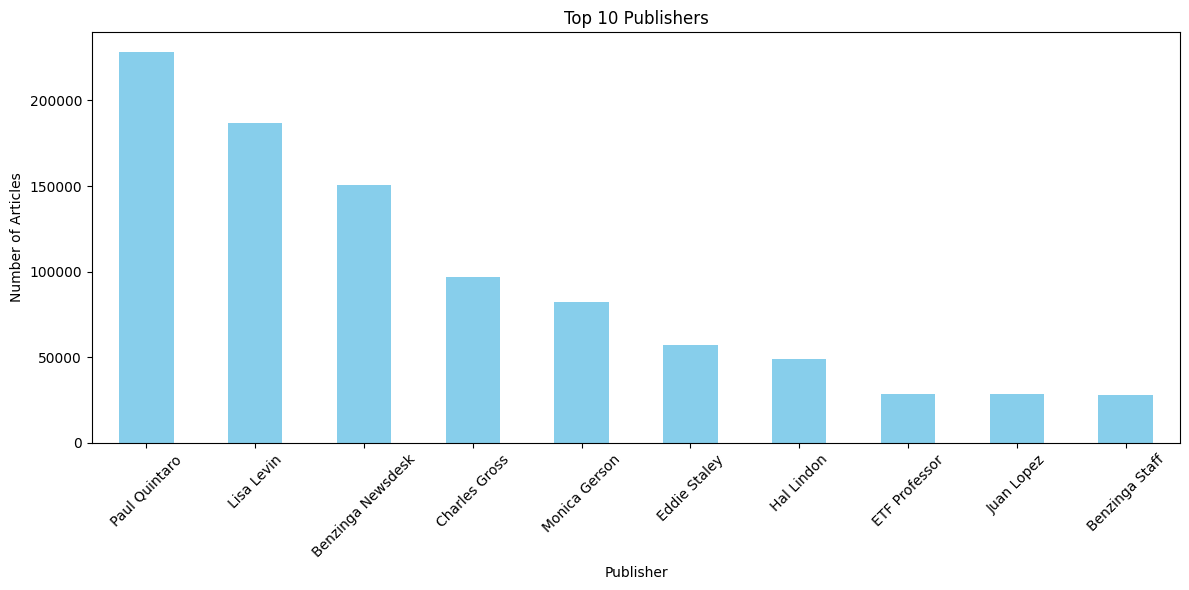

In [29]:
# Count articles per publisher
articles_per_publisher = df['publisher'].value_counts()

# Filter publishers with more than 8000 articles
filtered_publishers = articles_per_publisher[articles_per_publisher > 8000]

# Select top 10 publishers
top_publishers = filtered_publishers.head(10)

# Plotting
plt.figure(figsize=(12, 6))
top_publishers.plot(kind='bar', color='skyblue')
plt.title('Top 10 Publishers')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
# Percentage contribution of each publisher
publisher_percentage = (articles_per_publisher / articles_per_publisher.sum()) * 100
print("\nPublisher Contribution Percentage:\n")
print(publisher_percentage)



Publisher Contribution Percentage:

publisher
Paul Quintaro        16.227418
Lisa Levin           13.286100
Benzinga Newsdesk    10.692888
Charles Gross         6.873451
Monica Gerson         5.853646
                       ...    
Matthew Ely           0.000071
Frank Ochoa           0.000071
Jeremie Capron        0.000071
Marvin Dumont         0.000071
Igor Gonta            0.000071
Name: count, Length: 1034, dtype: float64


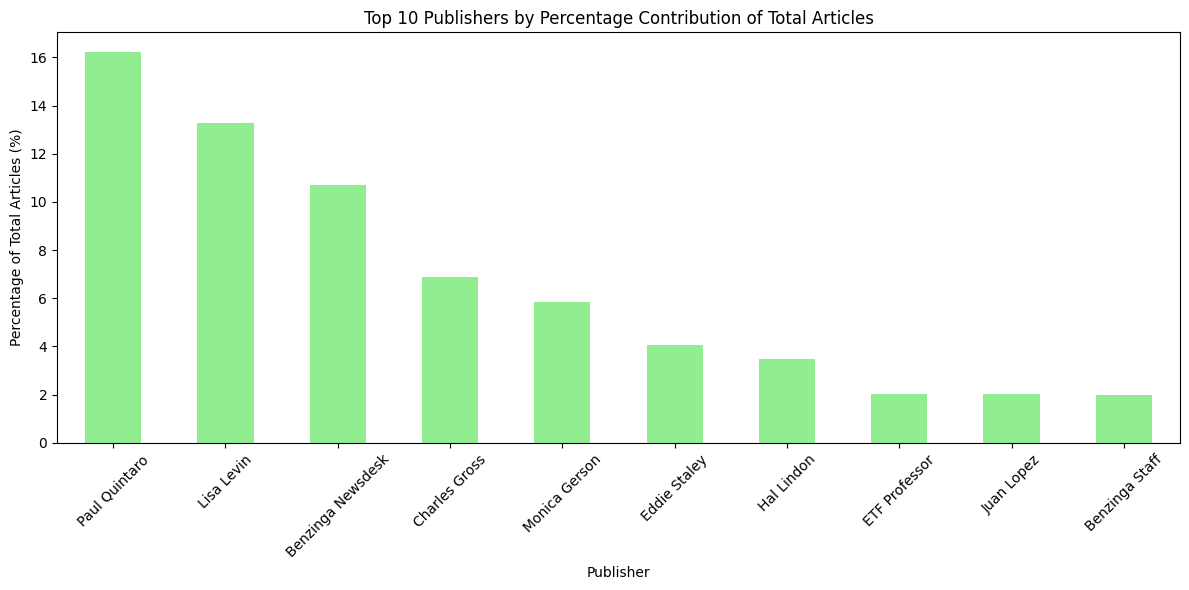


Top 10 Publisher Contribution Percentage:

publisher
Paul Quintaro        16.227418
Lisa Levin           13.286100
Benzinga Newsdesk    10.692888
Charles Gross         6.873451
Monica Gerson         5.853646
Eddie Staley          4.068277
Hal Lindon            3.485115
ETF Professor         2.024333
Juan Lopez            2.020709
Benzinga Staff        1.997686
Name: count, dtype: float64


In [34]:
# Count articles per publisher
articles_per_publisher = df['publisher'].value_counts()

# Calculate percentage contribution of each publisher
publisher_percentage = (articles_per_publisher / articles_per_publisher.sum()) * 100

# Select top 10 publishers
top_publishers_percentage = publisher_percentage.head(10)

# Plotting the percentage contribution of the top 10 publishers
plt.figure(figsize=(12, 6))
top_publishers_percentage.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Publishers by Percentage Contribution of Total Articles')
plt.xlabel('Publisher')
plt.ylabel('Percentage of Total Articles (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the percentage contributions of the top 10 publishers
print("\nTop 10 Publisher Contribution Percentage:\n")
print(top_publishers_percentage)

In [35]:
# Average headline length per publisher
df['headline_length'] = df['headline'].str.len()
avg_length_per_publisher = df.groupby('publisher')['headline_length'].mean()
print("\nAverage Headline Length per Publisher:\n")
print(avg_length_per_publisher)


Average Headline Length per Publisher:

publisher
47ertrends                    47.000000
AARP                          56.000000
ABNNewswire                   92.615385
Aakin                         35.600000
Aaron Jackson.Ed              37.187500
                                ...    
vic@forextraininggroup.com    51.000000
vishwanath@benzinga.com       77.045355
vivek.proactive@gmail.com     79.466667
wallstreet1928                40.500000
webmaster                     58.303845
Name: headline_length, Length: 1034, dtype: float64


Task 2: Quantitative analysis using pynance and TaLib

Load and prepare the data.

In [2]:
import yfinance as yf
import talib

In [3]:
import os
stock_data = {}
data_folder = '../yfinance_data'

# Load each historical data file
for file in os.listdir(data_folder):
    if file.endswith('_historical_data.csv'):
        ticker = file.split('_')[0]  # Extract ticker symbol
        file_path = os.path.join(data_folder, file)
        stock_data[ticker] = pd.read_csv(file_path)
        stock_data[ticker]['Date'] = pd.to_datetime(stock_data[ticker]['Date'])
# Display the first few rows of each stock's data
for ticker, data in stock_data.items():
    print(f"\n{ticker} Historical Data:")
    print(data.head())



MSFT Historical Data:
        Date      Open      High       Low     Close  Adj Close      Volume  \
0 1986-03-13  0.088542  0.101563  0.088542  0.097222   0.059946  1031788800   
1 1986-03-14  0.097222  0.102431  0.097222  0.100694   0.062087   308160000   
2 1986-03-17  0.100694  0.103299  0.100694  0.102431   0.063158   133171200   
3 1986-03-18  0.102431  0.103299  0.098958  0.099826   0.061552    67766400   
4 1986-03-19  0.099826  0.100694  0.097222  0.098090   0.060482    47894400   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  

NVDA Historical Data:
        Date      Open      High       Low     Close  Adj Close      Volume  \
0 1999-01-22  0.043750  0.048828  0.038802  0.041016   0.037621  2714688000   
1 1999-01-25  0.044271  0.045833  0.041016  0.045313   0.041562   510480000   
2 1999-01-26  0.045833  0.046745  0.041146  0.041797   0.038337   34

In [7]:
ticker = 'AMZN'  # Replace with the desired ticker symbol
if ticker in stock_data:
    print(f"\n{ticker} Historical Data:")
    print(stock_data[ticker].head())



AMZN Historical Data:
        Date      Open      High       Low     Close  Adj Close      Volume  \
0 1997-05-15  0.121875  0.125000  0.096354  0.097917   0.097917  1443120000   
1 1997-05-16  0.098438  0.098958  0.085417  0.086458   0.086458   294000000   
2 1997-05-19  0.088021  0.088542  0.081250  0.085417   0.085417   122136000   
3 1997-05-20  0.086458  0.087500  0.081771  0.081771   0.081771   109344000   
4 1997-05-21  0.081771  0.082292  0.068750  0.071354   0.071354   377064000   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [8]:
required_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
print(data.columns)
assert all(col in data.columns for col in required_columns), "Missing columns!"

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')


Apply Analysis Indicators with TA-Lib

In [9]:
data['SMA_20'] = talib.SMA(data['Close'], timeperiod=20)
data['SMA_50'] = talib.SMA(data['Close'], timeperiod=50)
data['RSI'] = talib.RSI(data['Close'], timeperiod=14)
data['MACD'], data['MACD_signal'], data['MACD_hist'] = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

In [10]:
ticker = yf.Ticker('AAPL')  
financials = ticker.financials
print(financials)

                                                        2024-09-30  \
Tax Effect Of Unusual Items                                    0.0   
Tax Rate For Calcs                                           0.241   
Normalized EBITDA                                   134661000000.0   
Net Income From Continuing Operation Net Minori...   93736000000.0   
Reconciled Depreciation                              11445000000.0   
Reconciled Cost Of Revenue                          210352000000.0   
EBITDA                                              134661000000.0   
EBIT                                                123216000000.0   
Net Interest Income                                            NaN   
Interest Expense                                               NaN   
Interest Income                                                NaN   
Normalized Income                                    93736000000.0   
Net Income From Continuing And Discontinued Ope...   93736000000.0   
Total Expenses      

In [11]:
ticker = yf.Ticker('AMZN')  
financials = ticker.financials
print(financials)

                                                            2024-12-31  \
Tax Effect Of Unusual Items                          -246971244.935436   
Tax Rate For Calcs                                            0.135031   
Normalized EBITDA                                       125644000000.0   
Total Unusual Items                                      -1829000000.0   
Total Unusual Items Excluding Goodwill                   -1829000000.0   
Net Income From Continuing Operation Net Minori...       59248000000.0   
Reconciled Depreciation                                  52795000000.0   
Reconciled Cost Of Revenue                              326288000000.0   
EBITDA                                                  123815000000.0   
EBIT                                                     71020000000.0   
Net Interest Income                                       2271000000.0   
Interest Expense                                          2406000000.0   
Interest Income                       

In [12]:
ticker = yf.Ticker('GOOG')  
financials = ticker.financials
print(financials)

                                                        2024-12-31  \
Tax Effect Of Unusual Items                            370968000.0   
Tax Rate For Calcs                                           0.164   
Normalized EBITDA                                   133132000000.0   
Total Unusual Items                                   2262000000.0   
Total Unusual Items Excluding Goodwill                2262000000.0   
Net Income From Continuing Operation Net Minori...  100118000000.0   
Reconciled Depreciation                              15311000000.0   
Reconciled Cost Of Revenue                          146306000000.0   
EBITDA                                              135394000000.0   
EBIT                                                120083000000.0   
Net Interest Income                                   4214000000.0   
Interest Expense                                       268000000.0   
Interest Income                                       4482000000.0   
Normalized Income   

In [13]:
ticker = yf.Ticker('META')  
financials = ticker.financials
print(financials)

                                                        2024-12-31  \
Tax Effect Of Unusual Items                            -81420000.0   
Tax Rate For Calcs                                           0.118   
Normalized EBITDA                                    87566000000.0   
Total Unusual Items                                   -690000000.0   
Total Unusual Items Excluding Goodwill                -690000000.0   
Net Income From Continuing Operation Net Minori...   62360000000.0   
Reconciled Depreciation                              15498000000.0   
Reconciled Cost Of Revenue                           30161000000.0   
EBITDA                                               86876000000.0   
EBIT                                                 71378000000.0   
Net Interest Income                                   1973000000.0   
Interest Expense                                       715000000.0   
Interest Income                                       2517000000.0   
Normalized Income   

In [14]:
ticker = yf.Ticker('MSFT')  
financials = ticker.financials
print(financials)

                                                        2024-06-30  \
Tax Effect Of Unusual Items                            -99918000.0   
Tax Rate For Calcs                                           0.182   
Normalized EBITDA                                   133558000000.0   
Total Unusual Items                                   -549000000.0   
Total Unusual Items Excluding Goodwill                -549000000.0   
Net Income From Continuing Operation Net Minori...   88136000000.0   
Reconciled Depreciation                              22287000000.0   
Reconciled Cost Of Revenue                           74114000000.0   
EBITDA                                              133009000000.0   
EBIT                                                110722000000.0   
Net Interest Income                                    222000000.0   
Interest Expense                                      2935000000.0   
Interest Income                                       3157000000.0   
Normalized Income   

In [15]:
ticker = yf.Ticker('NVDA')  
financials = ticker.financials
print(financials)

                                                        2025-01-31  \
Tax Effect Of Unusual Items                                    0.0   
Tax Rate For Calcs                                           0.133   
Normalized EBITDA                                    86137000000.0   
Total Unusual Items                                            0.0   
Total Unusual Items Excluding Goodwill                         0.0   
Net Income From Continuing Operation Net Minori...   72880000000.0   
Reconciled Depreciation                               1864000000.0   
Reconciled Cost Of Revenue                           32639000000.0   
EBITDA                                               86137000000.0   
EBIT                                                 84273000000.0   
Net Interest Income                                   1539000000.0   
Interest Expense                                       247000000.0   
Interest Income                                       1786000000.0   
Normalized Income   

In [16]:
ticker = yf.Ticker('TSLA')  
financials = ticker.financials
print(financials)

                                                       2024-12-31  \
Tax Effect Of Unusual Items                          -136800000.0   
Tax Rate For Calcs                                            0.2   
Normalized EBITDA                                   15392000000.0   
Total Unusual Items                                  -684000000.0   
Total Unusual Items Excluding Goodwill               -684000000.0   
Net Income From Continuing Operation Net Minori...   7130000000.0   
Reconciled Depreciation                              5368000000.0   
Reconciled Cost Of Revenue                          80240000000.0   
EBITDA                                              14708000000.0   
EBIT                                                 9340000000.0   
Net Interest Income                                  1219000000.0   
Interest Expense                                      350000000.0   
Interest Income                                      1569000000.0   
Normalized Income                 

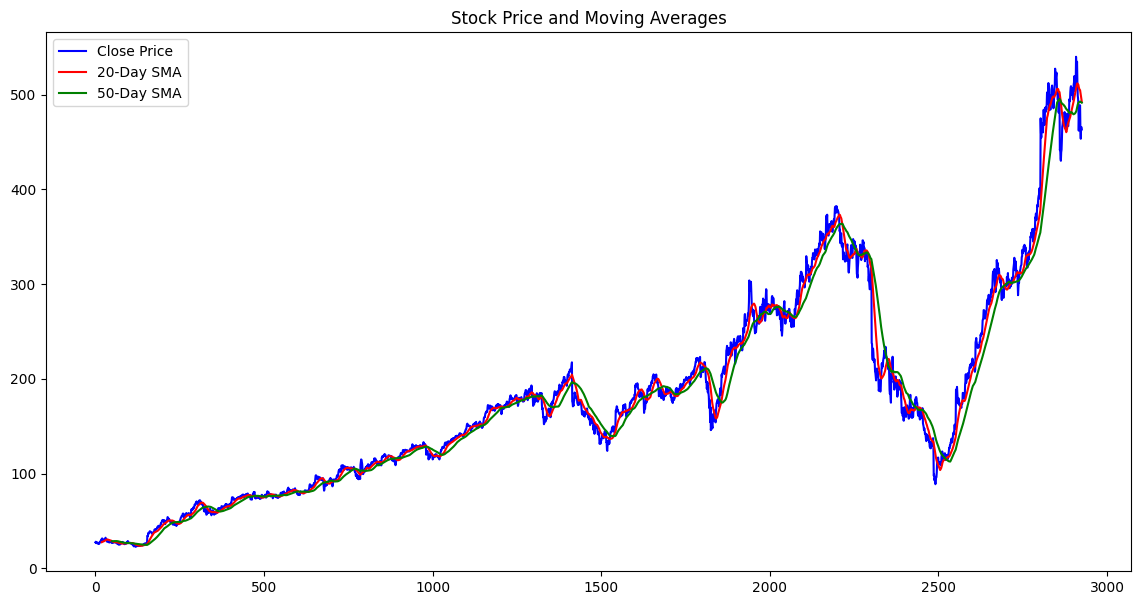

In [17]:
plt.figure(figsize=(14, 7))

# Plot closing price and moving averages
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['SMA_20'], label='20-Day SMA', color='red')
plt.plot(data['SMA_50'], label='50-Day SMA', color='green')

plt.title('Stock Price and Moving Averages')
plt.legend()
plt.show()

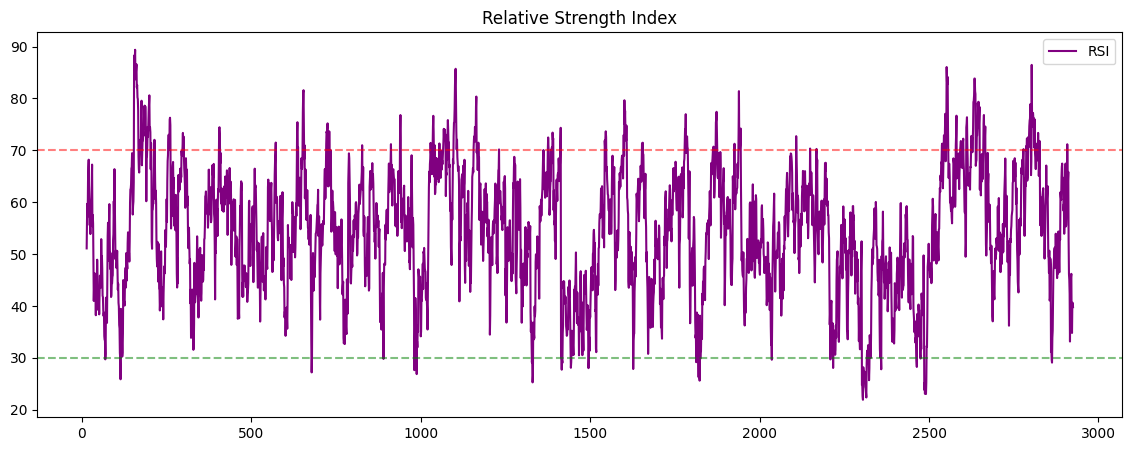

In [18]:
plt.figure(figsize=(14, 5))
plt.plot(data['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')
plt.axhline(30, linestyle='--', alpha=0.5, color='green')
plt.title('Relative Strength Index')
plt.legend()
plt.show()

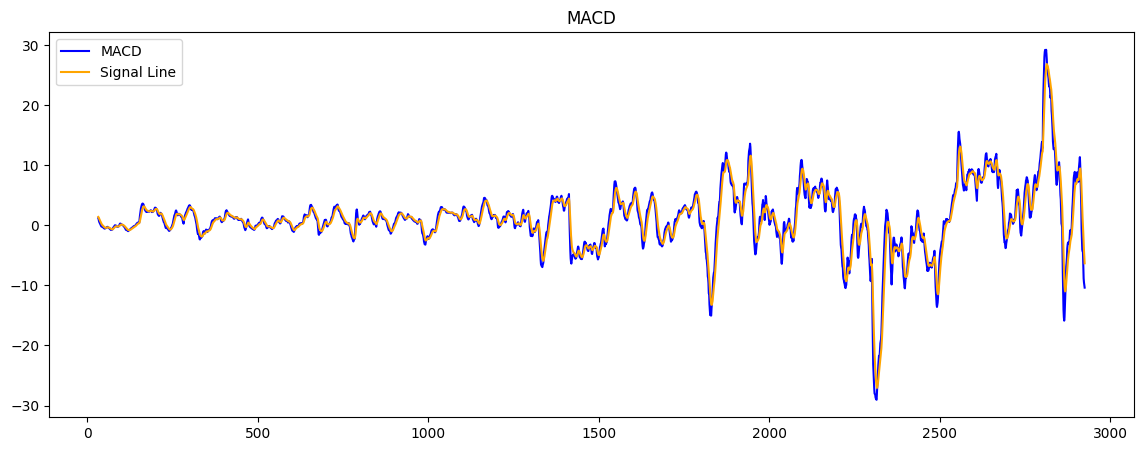

In [19]:
plt.figure(figsize=(14, 5))
plt.plot(data['MACD'], label='MACD', color='blue')
plt.plot(data['MACD_signal'], label='Signal Line', color='orange')
plt.title('MACD')
plt.legend()
plt.show()

In [21]:
import pandas as pd
import talib # Assuming talib is installed and available

# Load historical data for each stock with specified format
files = [
    ('../yfinance_data/AAPL_historical_data.csv', 'AAPL'),
    ('../yfinance_data/AMZN_historical_data.csv', 'AMZN'),
    ('../yfinance_data/GOOG_historical_data.csv', 'GOOG'),
    ('../yfinance_data/META_historical_data.csv', 'META'),
    ('../yfinance_data/MSFT_historical_data.csv', 'MSFT'),
    ('../yfinance_data/NVDA_historical_data.csv', 'NVDA'),
    ('../yfinance_data/TSLA_historical_data.csv', 'TSLA')
]

stock_data = {}
for filepath, stock_name in files:
    df = pd.read_csv(filepath)
    df['Ticker'] = stock_name  # Adding a new column for the ticker
    df['Date'] = pd.to_datetime(df['Date'])  # Convert Date column to datetime
    df.set_index('Date', inplace=True)  # Set Date as index
    stock_data[stock_name] = df  # Store DataFrame in the dictionary


In [37]:
combined_data = pd.concat([data['Close'] for data in stock_data.values()], axis=1)
combined_data.columns = stock_data.keys()  # Set the column names to the ticker symbols
# Calculate the correlation matrix
correlation_matrix = combined_data.corr()
# Display the correlation matrix
print(correlation_matrix)

          AAPL      AMZN      GOOG      META      MSFT      NVDA      TSLA
AAPL  1.000000  0.939652  0.976554  0.823407  0.982596  0.801800  0.933363
AMZN  0.939652  1.000000  0.955503  0.908714  0.943765  0.719252  0.838272
GOOG  0.976554  0.955503  1.000000  0.899305  0.982254  0.810045  0.901440
META  0.823407  0.908714  0.899305  1.000000  0.890959  0.827280  0.691001
MSFT  0.982596  0.943765  0.982254  0.890959  1.000000  0.851970  0.892231
NVDA  0.801800  0.719252  0.810045  0.827280  0.851970  1.000000  0.632133
TSLA  0.933363  0.838272  0.901440  0.691001  0.892231  0.632133  1.000000


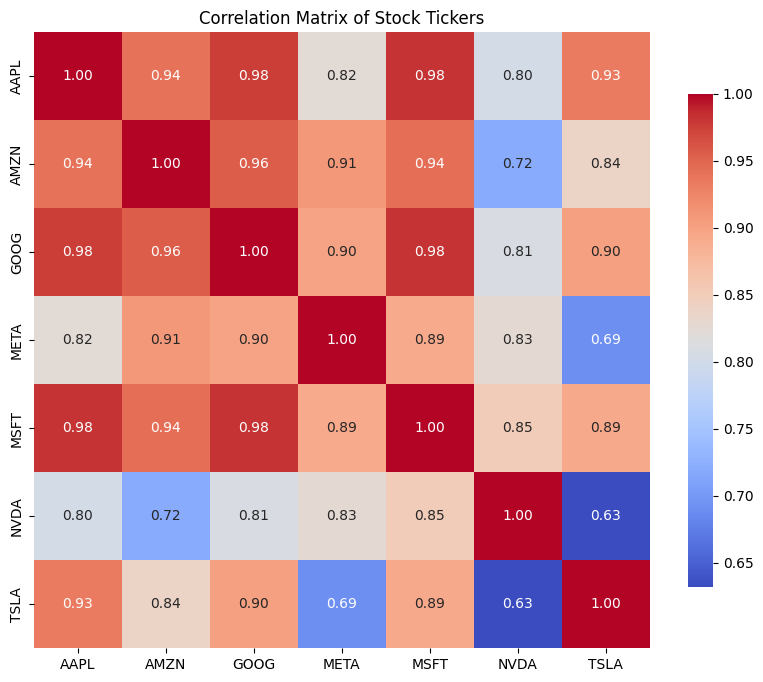

In [39]:
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Stock Tickers')
plt.show()

In [22]:
aapl_data = stock_data['AAPL']

# Calculate indicators for AAPL
# Ensure 'Close' is a numeric type if talib complains, though it usually handles it
aapl_data['SMA_50'] = talib.SMA(aapl_data['Close'], timeperiod=50)
aapl_data['RSI'] = talib.RSI(aapl_data['Close'], timeperiod=14)
aapl_data['MACD'], aapl_data['MACD_signal'], _ = talib.MACD(aapl_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

print("AAPL Data with Indicators (first 5 rows):")
print(aapl_data.head())
print("\nAAPL Index Name:", aapl_data.index.name)
print("AAPL Columns:", aapl_data.columns)
# Calculate indicators for AAPL
aapl_data['SMA_50'] = talib.SMA(aapl_data['Close'], timeperiod=50)
aapl_data['RSI'] = talib.RSI(aapl_data['Close'], timeperiod=14)
aapl_data['MACD'], aapl_data['MACD_signal'], _ = talib.MACD(aapl_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

AAPL Data with Indicators (first 5 rows):
                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

            Dividends  Stock Splits Ticker  SMA_50  RSI  MACD  MACD_signal  
Date                                                                        
1980-12-12        0.0           0.0   AAPL     NaN  NaN   NaN          NaN  
1980-12-15        0.0           0.0   AAPL     NaN  NaN   NaN          NaN  
1980-12-16        0.0           0.0   AAPL     NaN  NaN   NaN          NaN  
1980-12-17        0.0           0.0   AA

In [23]:
aapl = yf.Ticker("AAPL")
financials = aapl.financials  # No parentheses here!
print(financials)

                                                        2024-09-30  \
Tax Effect Of Unusual Items                                    0.0   
Tax Rate For Calcs                                           0.241   
Normalized EBITDA                                   134661000000.0   
Net Income From Continuing Operation Net Minori...   93736000000.0   
Reconciled Depreciation                              11445000000.0   
Reconciled Cost Of Revenue                          210352000000.0   
EBITDA                                              134661000000.0   
EBIT                                                123216000000.0   
Net Interest Income                                            NaN   
Interest Expense                                               NaN   
Interest Income                                                NaN   
Normalized Income                                    93736000000.0   
Net Income From Continuing And Discontinued Ope...   93736000000.0   
Total Expenses      

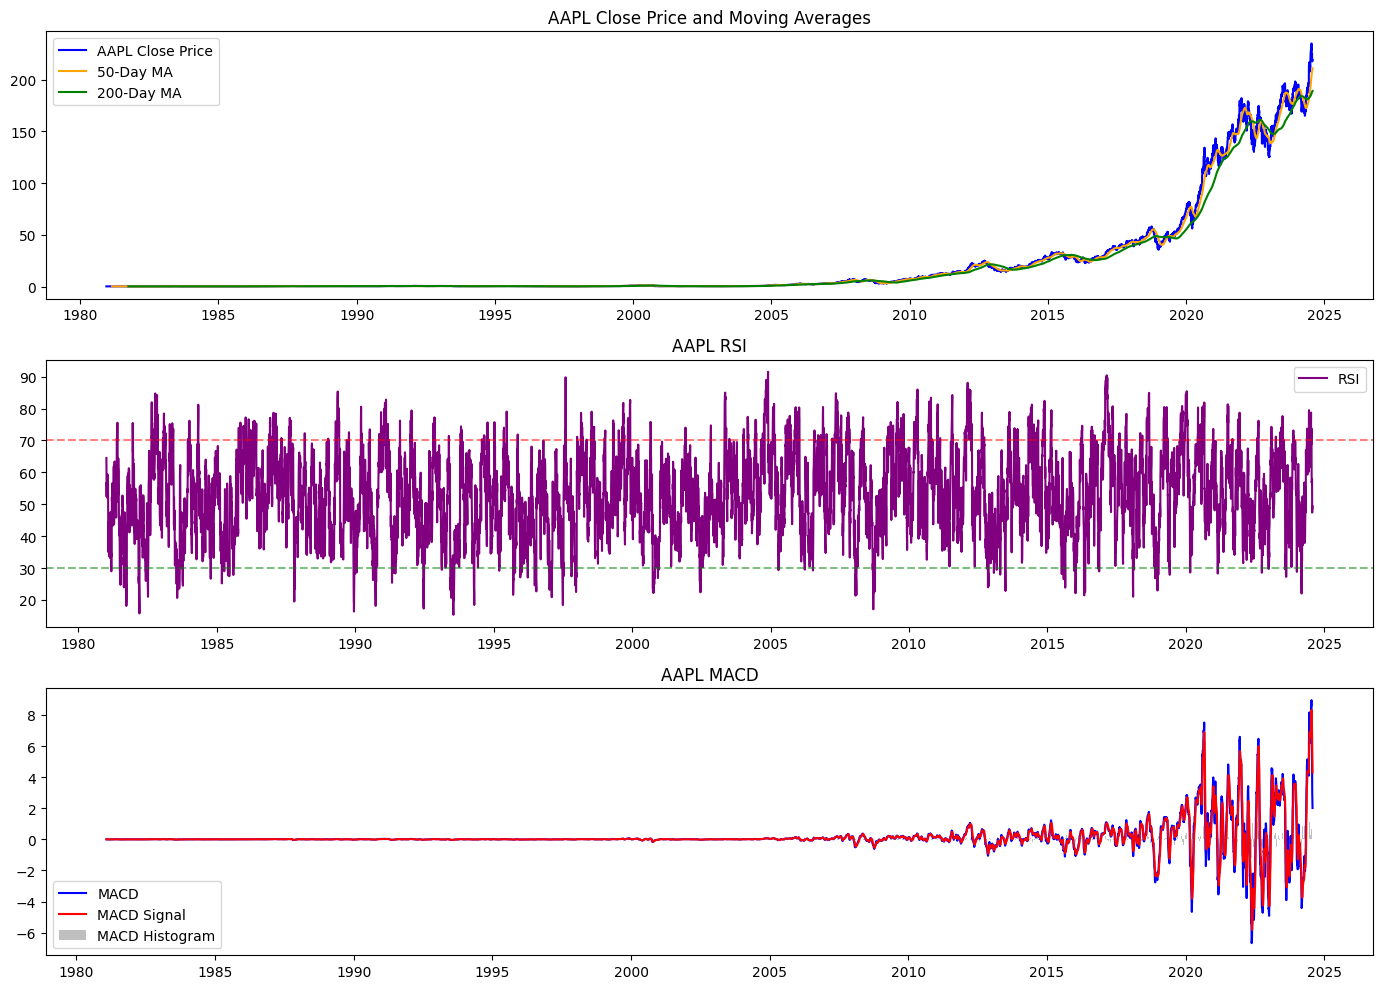

In [41]:
# Apply technical indicators
for stock_name, df in stock_data.items():
    df['MA50'] = talib.SMA(df['Close'], timeperiod=50)
    df['MA200'] = talib.SMA(df['Close'], timeperiod=200)
    df['RSI'] = talib.RSI(df['Close'], timeperiod=14)
    df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Example: Plotting the indicators for AAPL
plt.figure(figsize=(14, 10))

# Price and Moving Averages
plt.subplot(3, 1, 1)
plt.plot(stock_data['AAPL']['Close'], label='AAPL Close Price', color='blue')
plt.plot(stock_data['AAPL']['MA50'], label='50-Day MA', color='orange')
plt.plot(stock_data['AAPL']['MA200'], label='200-Day MA', color='green')
plt.title('AAPL Close Price and Moving Averages')
plt.legend()

# RSI
plt.subplot(3, 1, 2)
plt.plot(stock_data['AAPL']['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')
plt.axhline(30, linestyle='--', alpha=0.5, color='green')
plt.title('AAPL RSI')
plt.legend()

# MACD
plt.subplot(3, 1, 3)
plt.plot(stock_data['AAPL']['MACD'], label='MACD', color='blue')
plt.plot(stock_data['AAPL']['MACD_Signal'], label='MACD Signal', color='red')
plt.bar(stock_data['AAPL'].index, stock_data['AAPL']['MACD_Hist'], label='MACD Histogram', color='gray', alpha=0.5)
plt.title('AAPL MACD')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:

goog_data = stock_data['GOOG']

# Calculate indicators for GOOG
# Ensure 'Close' is a numeric type if talib complains, though it usually handles it
goog_data['SMA_50'] = talib.SMA(goog_data['Close'], timeperiod=50)
goog_data['RSI'] = talib.RSI(goog_data['Close'], timeperiod=14)
goog_data['MACD'], goog_data['MACD_signal'], _ = talib.MACD(goog_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

print("GOOG Data with Indicators (first 5 rows):")
print(goog_data.head())
print("\nGOOG Index Name:", goog_data.index.name)
print("GOOG Columns:", goog_data.columns)

goog_data['SMA_50'] = talib.SMA(goog_data['Close'], timeperiod=50)
goog_data['RSI'] = talib.RSI(goog_data['Close'], timeperiod=14)
goog_data['MACD'], goog_data['MACD_signal'], _ = talib.MACD(goog_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
goog = yf.Ticker("GOOG")
financials = goog.financials 
print(financials)

GOOG Data with Indicators (first 5 rows):
                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
2004-08-19  2.490664  2.591785  2.390042  2.499133   2.496292  897427216   
2004-08-20  2.515820  2.716817  2.503118  2.697639   2.694573  458857488   
2004-08-23  2.758411  2.826406  2.716070  2.724787   2.721690  366857939   
2004-08-24  2.770615  2.779581  2.579581  2.611960   2.608991  306396159   
2004-08-25  2.614201  2.689918  2.587302  2.640104   2.637103  184645512   

            Dividends  Stock Splits Ticker  SMA_50  RSI  MACD  MACD_signal  
Date                                                                        
2004-08-19        0.0           0.0   GOOG     NaN  NaN   NaN          NaN  
2004-08-20        0.0           0.0   GOOG     NaN  NaN   NaN          NaN  
2004-08-23        0.0           0.0   GOOG     NaN  NaN   NaN          NaN  
2004-08-24        0.0           0.0   GO

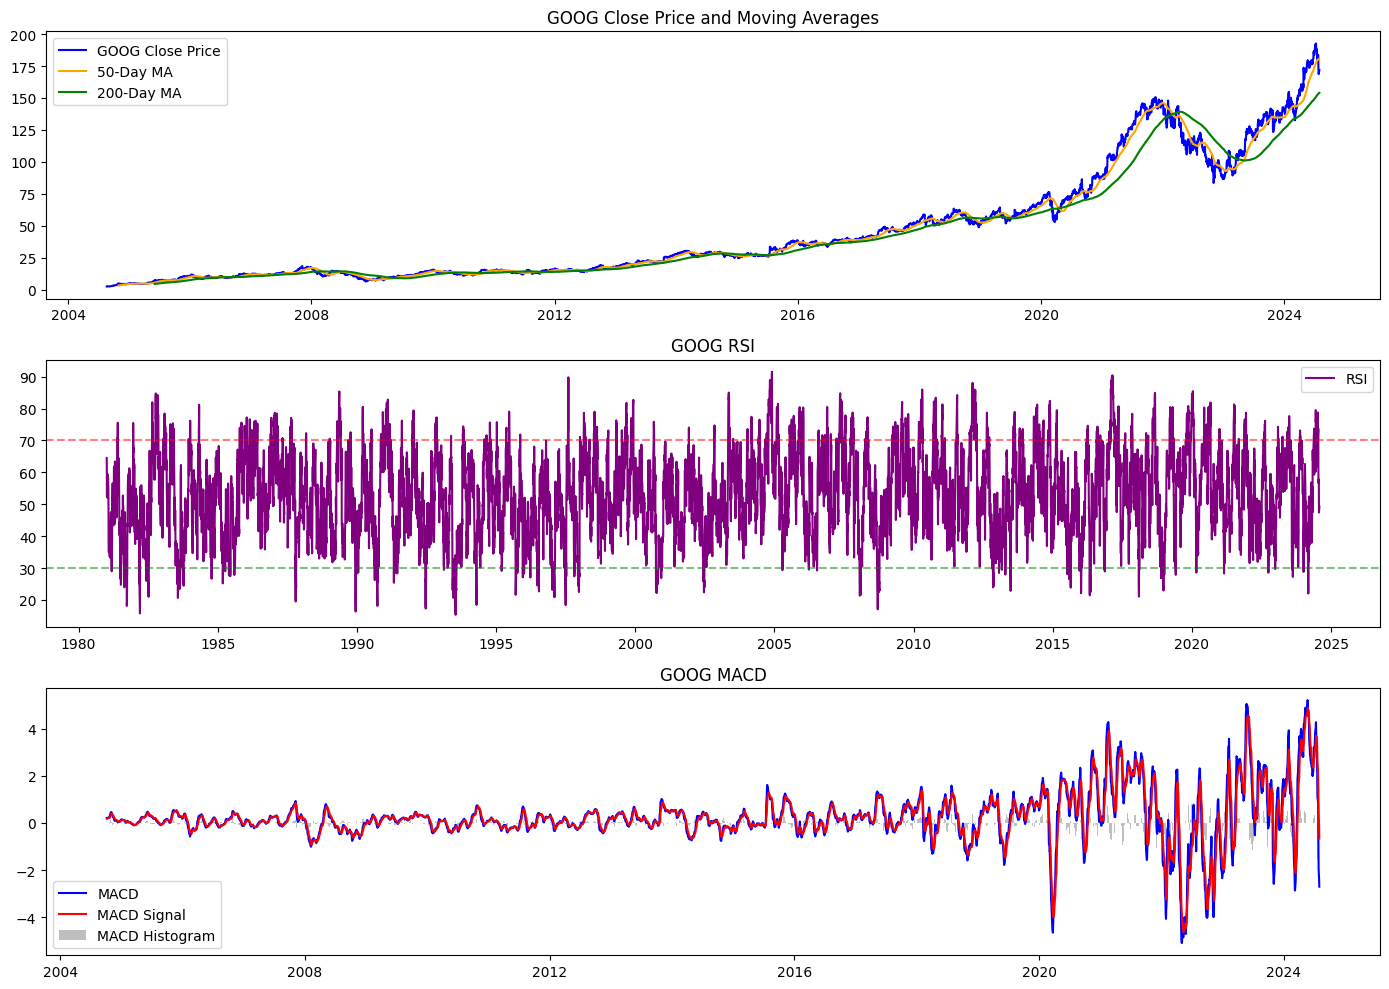

In [42]:
# Apply technical indicators
for stock_name, df in stock_data.items():
    df['MA50'] = talib.SMA(df['Close'], timeperiod=50)
    df['MA200'] = talib.SMA(df['Close'], timeperiod=200)
    df['RSI'] = talib.RSI(df['Close'], timeperiod=14)
    df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Example: Plotting the indicators for GOOG
plt.figure(figsize=(14, 10))

# Price and Moving Averages
plt.subplot(3, 1, 1)
plt.plot(stock_data['GOOG']['Close'], label='GOOG Close Price', color='blue')
plt.plot(stock_data['GOOG']['MA50'], label='50-Day MA', color='orange')
plt.plot(stock_data['GOOG']['MA200'], label='200-Day MA', color='green')
plt.title('GOOG Close Price and Moving Averages')
plt.legend()

# RSI
plt.subplot(3, 1, 2)
plt.plot(stock_data['AAPL']['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')
plt.axhline(30, linestyle='--', alpha=0.5, color='green')
plt.title('GOOG RSI')
plt.legend()

# MACD
plt.subplot(3, 1, 3)
plt.plot(stock_data['GOOG']['MACD'], label='MACD', color='blue')
plt.plot(stock_data['GOOG']['MACD_Signal'], label='MACD Signal', color='red')
plt.bar(stock_data['GOOG'].index, stock_data['GOOG']['MACD_Hist'], label='MACD Histogram', color='gray', alpha=0.5)
plt.title('GOOG MACD')
plt.legend()

plt.tight_layout()
plt.show()

In [27]:

amzn_data = stock_data['AMZN']

# Calculate indicators for AMZN
# Ensure 'Close' is a numeric type if talib complains, though it usually handles it
amzn_data['SMA_50'] = talib.SMA(amzn_data['Close'], timeperiod=50)
amzn_data['RSI'] = talib.RSI(amzn_data['Close'], timeperiod=14)
amzn_data['MACD'], amzn_data['MACD_signal'], _ = talib.MACD(amzn_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

print("AMZN Data with Indicators (first 5 rows):")
print(amzn_data.head())
print("\nAMZN Index Name:", amzn_data.index.name)
print("AMZN Columns:", amzn_data.columns)
# Calculate indicators for AMZN
amzn_data['SMA_50'] = talib.SMA(amzn_data['Close'], timeperiod=50)
amzn_data['RSI'] = talib.RSI(amzn_data['Close'], timeperiod=14)
amzn_data['MACD'], amzn_data['MACD_signal'], _ = talib.MACD(amzn_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
amzn = yf.Ticker("AMZN")
financials = amzn.financials  # No parentheses here!
print(financials)

AMZN Data with Indicators (first 5 rows):
                Open      High       Low     Close  Adj Close      Volume  \
Date                                                                        
1997-05-15  0.121875  0.125000  0.096354  0.097917   0.097917  1443120000   
1997-05-16  0.098438  0.098958  0.085417  0.086458   0.086458   294000000   
1997-05-19  0.088021  0.088542  0.081250  0.085417   0.085417   122136000   
1997-05-20  0.086458  0.087500  0.081771  0.081771   0.081771   109344000   
1997-05-21  0.081771  0.082292  0.068750  0.071354   0.071354   377064000   

            Dividends  Stock Splits Ticker  SMA_50  RSI  MACD  MACD_signal  
Date                                                                        
1997-05-15        0.0           0.0   AMZN     NaN  NaN   NaN          NaN  
1997-05-16        0.0           0.0   AMZN     NaN  NaN   NaN          NaN  
1997-05-19        0.0           0.0   AMZN     NaN  NaN   NaN          NaN  
1997-05-20        0.0           0

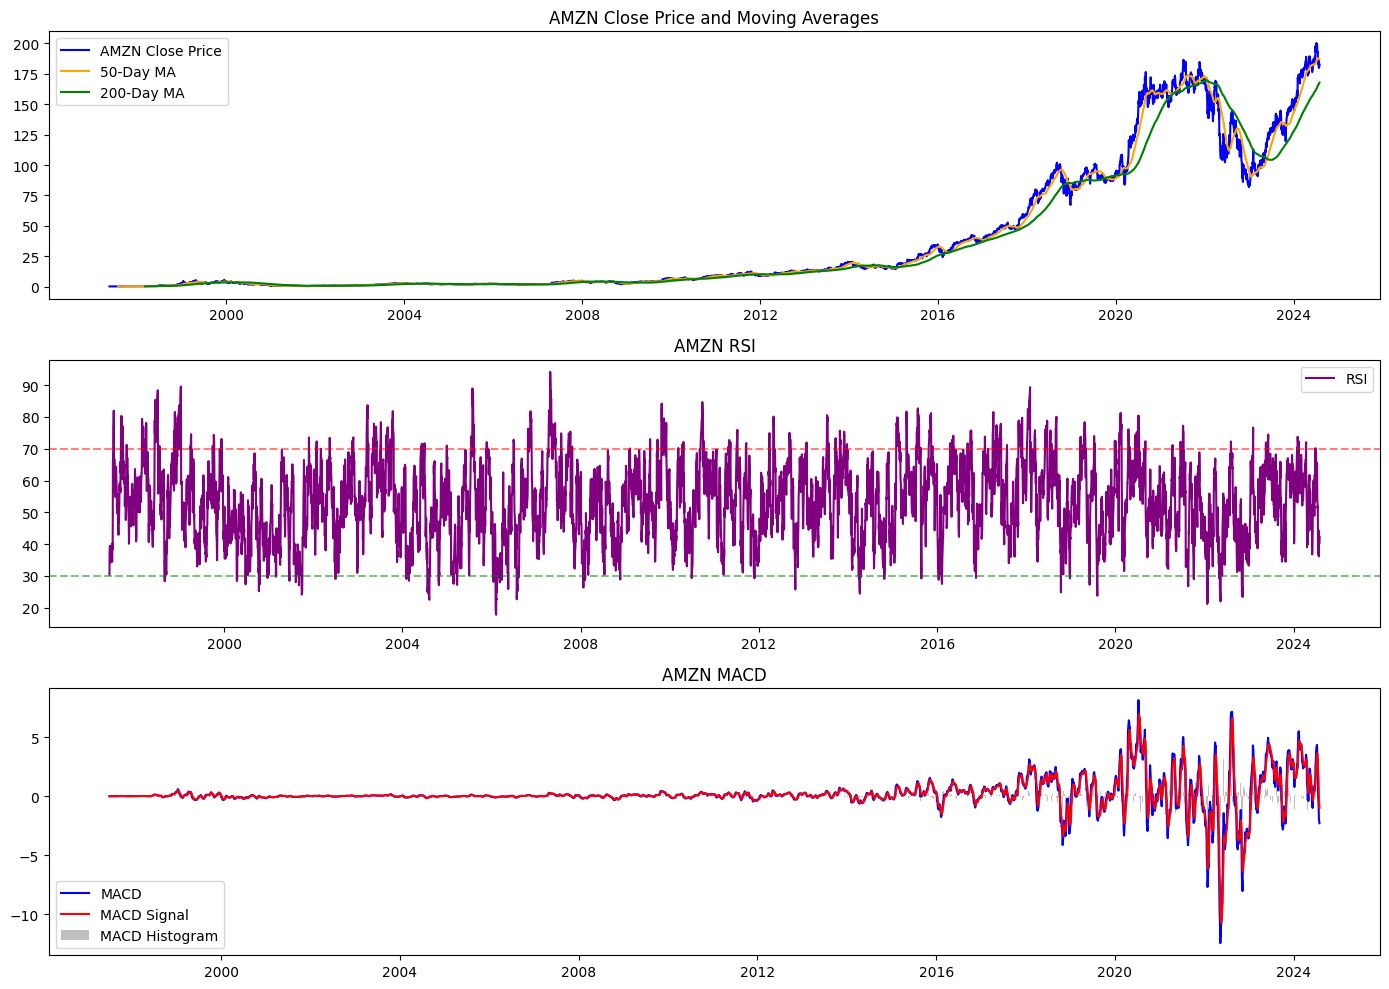

In [43]:
# Apply technical indicators
for stock_name, df in stock_data.items():
    df['MA50'] = talib.SMA(df['Close'], timeperiod=50)
    df['MA200'] = talib.SMA(df['Close'], timeperiod=200)
    df['RSI'] = talib.RSI(df['Close'], timeperiod=14)
    df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Example: Plotting the indicators for AMZN
plt.figure(figsize=(14, 10))

# Price and Moving Averages
plt.subplot(3, 1, 1)
plt.plot(stock_data['AMZN']['Close'], label='AMZN Close Price', color='blue')
plt.plot(stock_data['AMZN']['MA50'], label='50-Day MA', color='orange')
plt.plot(stock_data['AMZN']['MA200'], label='200-Day MA', color='green')
plt.title('AMZN Close Price and Moving Averages')
plt.legend()

# RSI
plt.subplot(3, 1, 2)
plt.plot(stock_data['AMZN']['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')
plt.axhline(30, linestyle='--', alpha=0.5, color='green')
plt.title('AMZN RSI')
plt.legend()

# MACD
plt.subplot(3, 1, 3)
plt.plot(stock_data['AMZN']['MACD'], label='MACD', color='blue')
plt.plot(stock_data['AMZN']['MACD_Signal'], label='MACD Signal', color='red')
plt.bar(stock_data['AMZN'].index, stock_data['AMZN']['MACD_Hist'], label='MACD Histogram', color='gray', alpha=0.5)
plt.title('AMZN MACD')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
meta_data = stock_data['META']
meta_data['SMA_50'] = talib.SMA(meta_data['Close'], timeperiod=50)
meta_data['RSI'] = talib.RSI(meta_data['Close'], timeperiod=14)
meta_data['MACD'], meta_data['MACD_signal'], _ = talib.MACD(meta_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

print("META Data with Indicators (first 5 rows):")
print(meta_data.head())
print("\nMETA Index Name:", meta_data.index.name)
print("META Columns:", meta_data.columns)

meta_data['SMA_50'] = talib.SMA(meta_data['Close'], timeperiod=50)
meta_data['RSI'] = talib.RSI(meta_data['Close'], timeperiod=14)
meta_data['MACD'], meta_data['MACD_signal'], _ = talib.MACD(meta_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
meta = yf.Ticker("META")
financials = meta.financials  # No parentheses here!
print(financials)

META Data with Indicators (first 5 rows):
                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2012-12-12  28.000000  28.139999  27.370001  27.580000  27.523441  46704200   
2012-12-13  27.590000  28.750000  27.430000  28.240000  28.182087  81051600   
2012-12-14  28.180000  28.330000  26.760000  26.809999  26.755020  91631600   
2012-12-17  26.770000  27.000000  26.320000  26.750000  26.695143  57742500   
2012-12-18  26.959999  27.910000  26.900000  27.709999  27.653173  60512900   

            Dividends  Stock Splits Ticker  SMA_50  RSI  MACD  MACD_signal  
Date                                                                        
2012-12-12        0.0           0.0   META     NaN  NaN   NaN          NaN  
2012-12-13        0.0           0.0   META     NaN  NaN   NaN          NaN  
2012-12-14        0.0           0.0   META     NaN  NaN   NaN          NaN  
2012-12-17        0

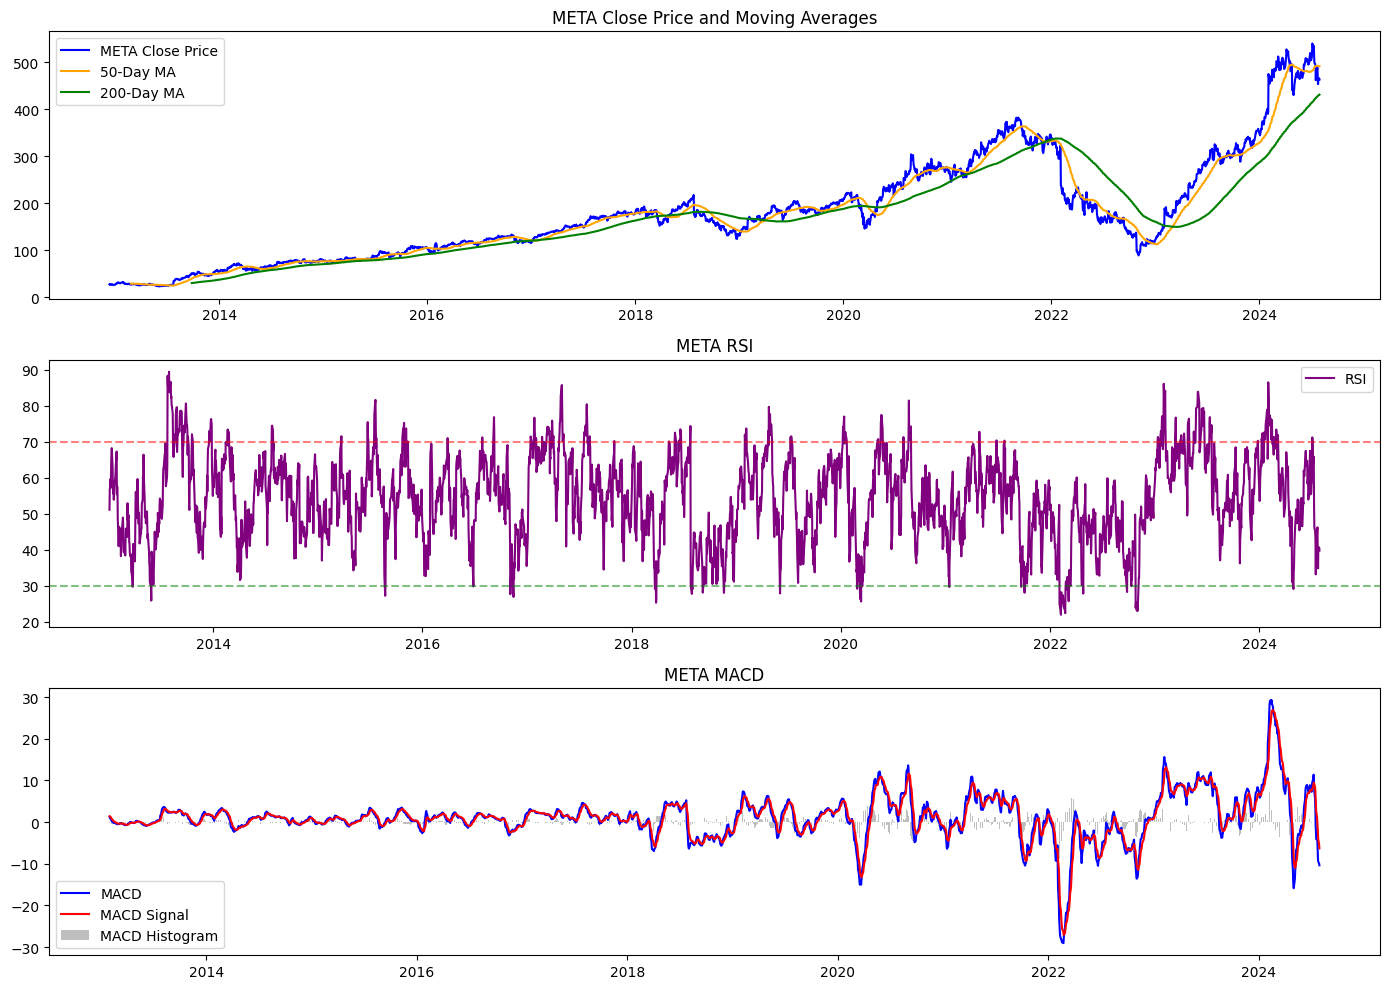

In [44]:
# Apply technical indicators
for stock_name, df in stock_data.items():
    df['MA50'] = talib.SMA(df['Close'], timeperiod=50)
    df['MA200'] = talib.SMA(df['Close'], timeperiod=200)
    df['RSI'] = talib.RSI(df['Close'], timeperiod=14)
    df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Example: Plotting the indicators for META
plt.figure(figsize=(14, 10))

# Price and Moving Averages
plt.subplot(3, 1, 1)
plt.plot(stock_data['META']['Close'], label='META Close Price', color='blue')
plt.plot(stock_data['META']['MA50'], label='50-Day MA', color='orange')
plt.plot(stock_data['META']['MA200'], label='200-Day MA', color='green')
plt.title('META Close Price and Moving Averages')
plt.legend()

# RSI
plt.subplot(3, 1, 2)
plt.plot(stock_data['META']['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')
plt.axhline(30, linestyle='--', alpha=0.5, color='green')
plt.title('META RSI')
plt.legend()

# MACD
plt.subplot(3, 1, 3)
plt.plot(stock_data['META']['MACD'], label='MACD', color='blue')
plt.plot(stock_data['META']['MACD_Signal'], label='MACD Signal', color='red')
plt.bar(stock_data['META'].index, stock_data['META']['MACD_Hist'], label='MACD Histogram', color='gray', alpha=0.5)
plt.title('META MACD')
plt.legend()

plt.tight_layout()
plt.show()

In [31]:

meta_data = stock_data['MSFT']

# Calculate indicators for META
# Ensure 'Close' is a numeric type if talib complains, though it usually handles it
meta_data['SMA_50'] = talib.SMA(meta_data['Close'], timeperiod=50)
meta_data['RSI'] = talib.RSI(meta_data['Close'], timeperiod=14)
meta_data['MACD'], meta_data['MACD_signal'], _ = talib.MACD(meta_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

print("MSFT Data with Indicators (first 5 rows):")
print(meta_data.head())
print("\nMSFT Index Name:", meta_data.index.name)
print("MSFT Columns:", meta_data.columns)
# Calculate indicators for AAPL
meta_data['SMA_50'] = talib.SMA(meta_data['Close'], timeperiod=50)
meta_data['RSI'] = talib.RSI(meta_data['Close'], timeperiod=14)
meta_data['MACD'], meta_data['MACD_signal'], _ = talib.MACD(meta_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
meta = yf.Ticker("MSFT")
financials = meta.financials  # No parentheses here!
print(financials)

MSFT Data with Indicators (first 5 rows):
                Open      High       Low     Close  Adj Close      Volume  \
Date                                                                        
1986-03-13  0.088542  0.101563  0.088542  0.097222   0.059946  1031788800   
1986-03-14  0.097222  0.102431  0.097222  0.100694   0.062087   308160000   
1986-03-17  0.100694  0.103299  0.100694  0.102431   0.063158   133171200   
1986-03-18  0.102431  0.103299  0.098958  0.099826   0.061552    67766400   
1986-03-19  0.099826  0.100694  0.097222  0.098090   0.060482    47894400   

            Dividends  Stock Splits Ticker  SMA_50  RSI  MACD  MACD_signal  
Date                                                                        
1986-03-13        0.0           0.0   MSFT     NaN  NaN   NaN          NaN  
1986-03-14        0.0           0.0   MSFT     NaN  NaN   NaN          NaN  
1986-03-17        0.0           0.0   MSFT     NaN  NaN   NaN          NaN  
1986-03-18        0.0           0

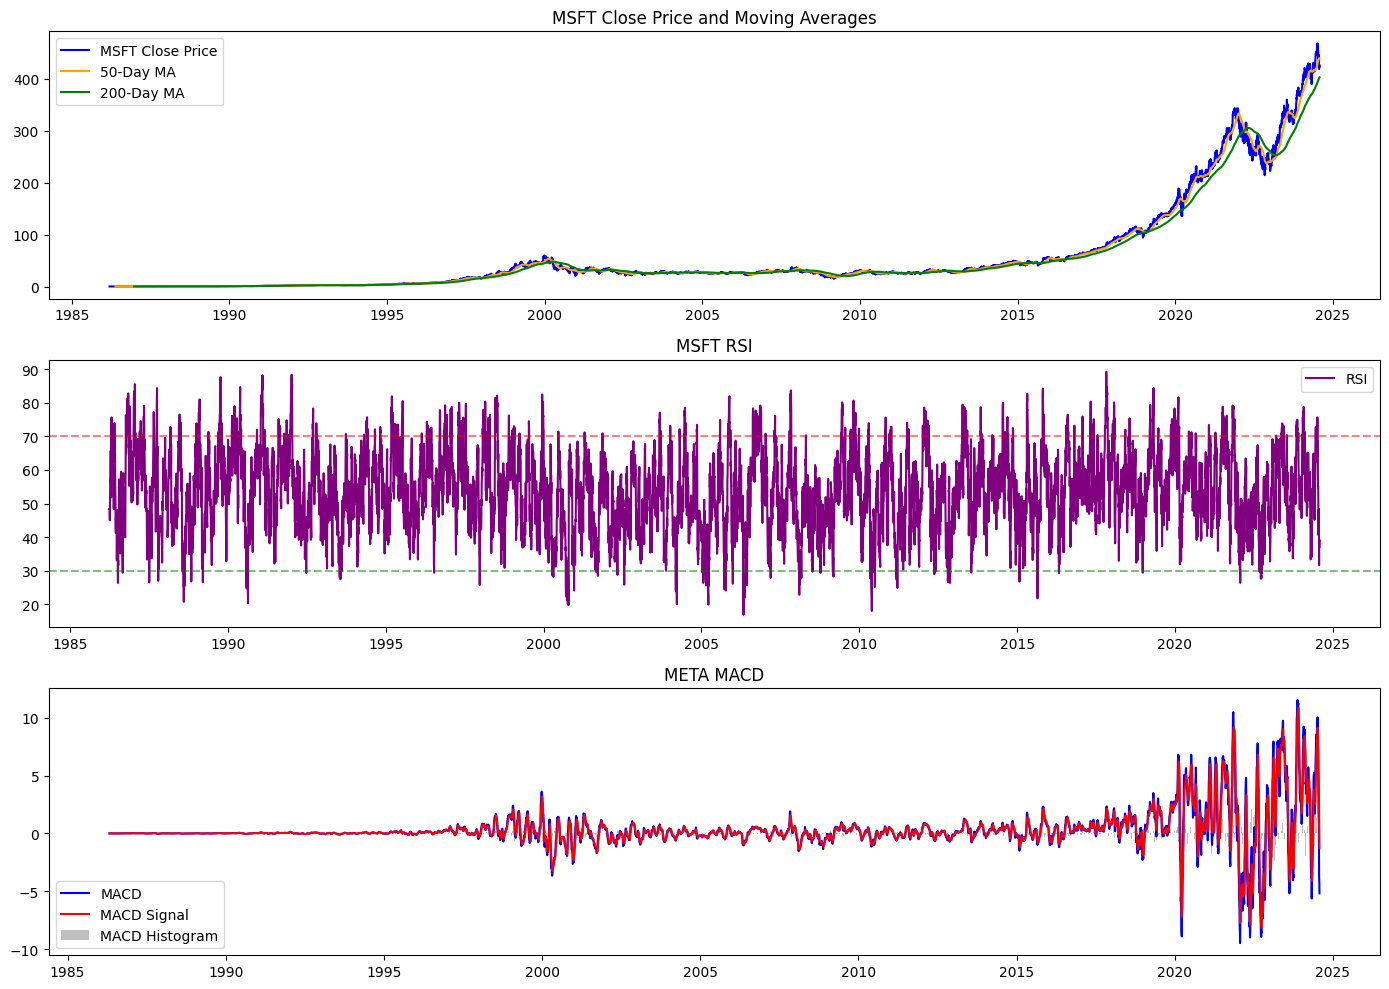

In [45]:
# Apply technical indicators
for stock_name, df in stock_data.items():
    df['MA50'] = talib.SMA(df['Close'], timeperiod=50)
    df['MA200'] = talib.SMA(df['Close'], timeperiod=200)
    df['RSI'] = talib.RSI(df['Close'], timeperiod=14)
    df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Example: Plotting the indicators for MSFT
plt.figure(figsize=(14, 10))

# Price and Moving Averages
plt.subplot(3, 1, 1)
plt.plot(stock_data['MSFT']['Close'], label='MSFT Close Price', color='blue')
plt.plot(stock_data['MSFT']['MA50'], label='50-Day MA', color='orange')
plt.plot(stock_data['MSFT']['MA200'], label='200-Day MA', color='green')
plt.title('MSFT Close Price and Moving Averages')
plt.legend()

# RSI
plt.subplot(3, 1, 2)
plt.plot(stock_data['MSFT']['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')
plt.axhline(30, linestyle='--', alpha=0.5, color='green')
plt.title('MSFT RSI')
plt.legend()

# MACD
plt.subplot(3, 1, 3)
plt.plot(stock_data['MSFT']['MACD'], label='MACD', color='blue')
plt.plot(stock_data['MSFT']['MACD_Signal'], label='MACD Signal', color='red')
plt.bar(stock_data['MSFT'].index, stock_data['MSFT']['MACD_Hist'], label='MACD Histogram', color='gray', alpha=0.5)
plt.title('META MACD')
plt.legend()

plt.tight_layout()
plt.show()

In [33]:

nvda_data = stock_data['NVDA']
nvda_data['SMA_50'] = talib.SMA(nvda_data['Close'], timeperiod=50)
nvda_data['RSI'] = talib.RSI(nvda_data['Close'], timeperiod=14)
nvda_data['MACD'], nvda_data['MACD_signal'], _ = talib.MACD(nvda_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

print("NVDA Data with Indicators (first 5 rows):")
print(nvda_data.head())
print("\nNVDA Index Name:", nvda_data.index.name)
print("NVDA Columns:", nvda_data.columns)
# Calculate indicators for AAPL
nvda_data['SMA_50'] = talib.SMA(nvda_data['Close'], timeperiod=50)
nvda_data['RSI'] = talib.RSI(nvda_data['Close'], timeperiod=14)
nvda_data['MACD'], nvda_data['MACD_signal'], _ = talib.MACD(nvda_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
nvda = yf.Ticker("NVDA")
financials = nvda.financials  # No parentheses here!
print(financials)

NVDA Data with Indicators (first 5 rows):
                Open      High       Low     Close  Adj Close      Volume  \
Date                                                                        
1999-01-22  0.043750  0.048828  0.038802  0.041016   0.037621  2714688000   
1999-01-25  0.044271  0.045833  0.041016  0.045313   0.041562   510480000   
1999-01-26  0.045833  0.046745  0.041146  0.041797   0.038337   343200000   
1999-01-27  0.041927  0.042969  0.039583  0.041667   0.038218   244368000   
1999-01-28  0.041667  0.041927  0.041276  0.041536   0.038098   227520000   

            Dividends  Stock Splits Ticker  SMA_50  RSI  MACD  MACD_signal  
Date                                                                        
1999-01-22        0.0           0.0   NVDA     NaN  NaN   NaN          NaN  
1999-01-25        0.0           0.0   NVDA     NaN  NaN   NaN          NaN  
1999-01-26        0.0           0.0   NVDA     NaN  NaN   NaN          NaN  
1999-01-27        0.0           0

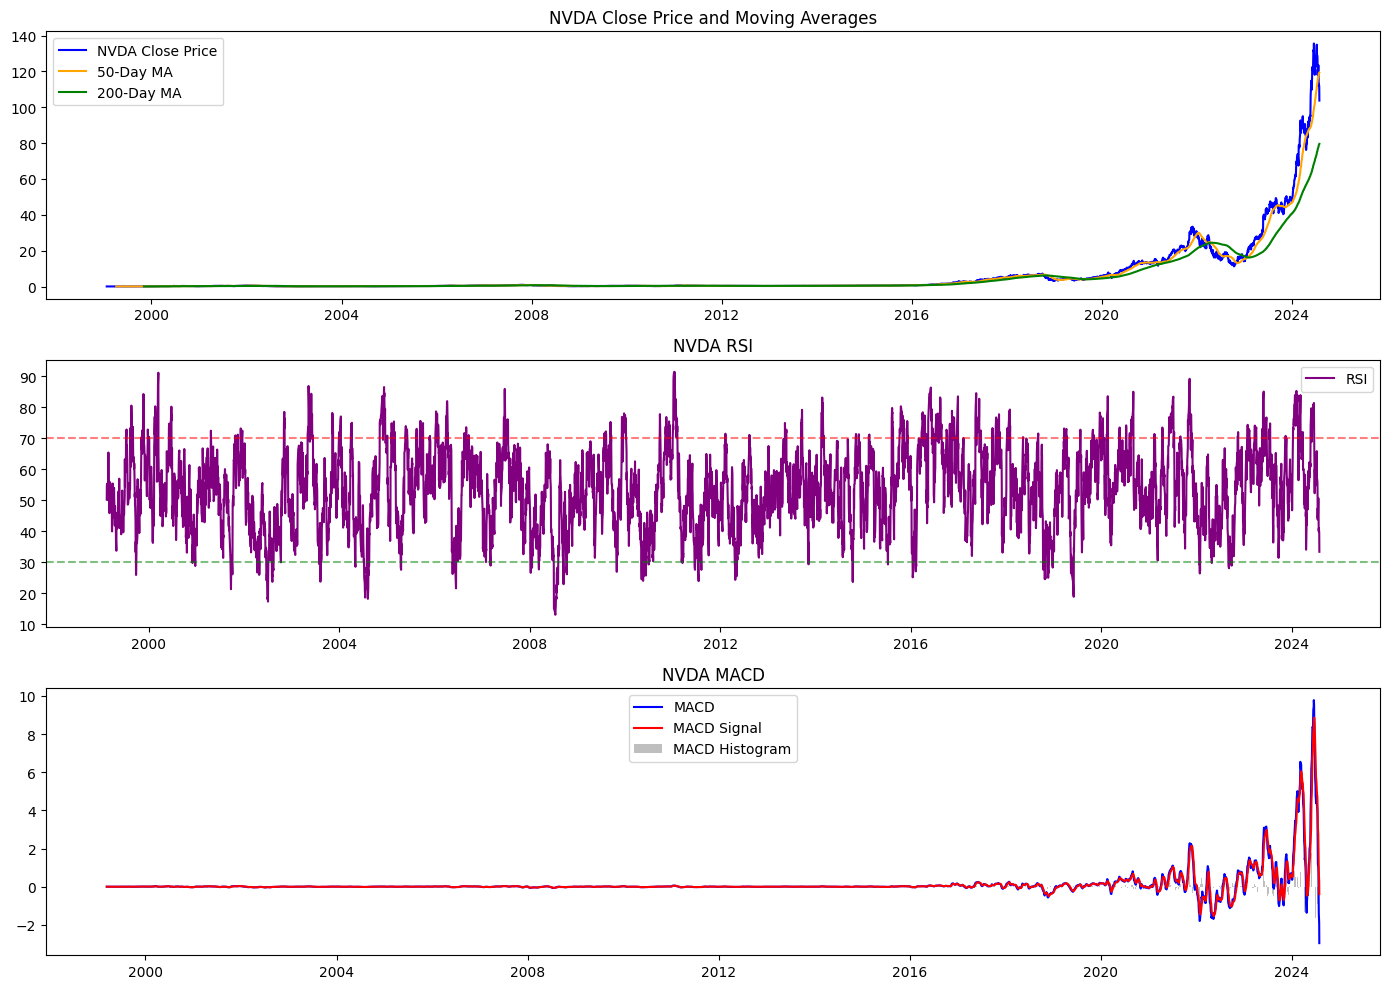

In [46]:
# Apply technical indicators
for stock_name, df in stock_data.items():
    df['MA50'] = talib.SMA(df['Close'], timeperiod=50)
    df['MA200'] = talib.SMA(df['Close'], timeperiod=200)
    df['RSI'] = talib.RSI(df['Close'], timeperiod=14)
    df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Example: Plotting the indicators for NVDA
plt.figure(figsize=(14, 10))

# Price and Moving Averages
plt.subplot(3, 1, 1)
plt.plot(stock_data['NVDA']['Close'], label='NVDA Close Price', color='blue')
plt.plot(stock_data['NVDA']['MA50'], label='50-Day MA', color='orange')
plt.plot(stock_data['NVDA']['MA200'], label='200-Day MA', color='green')
plt.title('NVDA Close Price and Moving Averages')
plt.legend()

# RSI
plt.subplot(3, 1, 2)
plt.plot(stock_data['NVDA']['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')
plt.axhline(30, linestyle='--', alpha=0.5, color='green');
plt.title('NVDA RSI')
plt.legend()

# MACD
plt.subplot(3, 1, 3)
plt.plot(stock_data['NVDA']['MACD'], label='MACD', color='blue')
plt.plot(stock_data['NVDA']['MACD_Signal'], label='MACD Signal', color='red')
plt.bar(stock_data['NVDA'].index, stock_data['NVDA']['MACD_Hist'], label='MACD Histogram', color='gray', alpha=0.5)
plt.title('NVDA MACD')
plt.legend()

plt.tight_layout()
plt.show()

In [35]:

tsla_data = stock_data['TSLA']

# Calculate indicators for TSLA
# Ensure 'Close' is a numeric type if talib complains, though it usually handles it
tsla_data['SMA_50'] = talib.SMA(tsla_data['Close'], timeperiod=50)
tsla_data['RSI'] = talib.RSI(tsla_data['Close'], timeperiod=14)
tsla_data['MACD'], tsla_data['MACD_signal'], _ = talib.MACD(tsla_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

print("TSLA Data with Indicators (first 5 rows):")
print(tsla_data.head())
print("\nTSLA Index Name:", tsla_data.index.name)
print("TSLA Columns:", tsla_data.columns)
# Calculate indicators for AAPL
tsla_data['SMA_50'] = talib.SMA(tsla_data['Close'], timeperiod=50)
tsla_data['RSI'] = talib.RSI(tsla_data['Close'], timeperiod=14)
tsla_data['MACD'], tsla_data['MACD_signal'], _ = talib.MACD(tsla_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
tsla = yf.Ticker("TSLA")
financials = tsla.financials  # No parentheses here!
print(financials)

TSLA Data with Indicators (first 5 rows):
                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500   
2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500   
2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000   
2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000   
2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500   

            Dividends  Stock Splits Ticker  SMA_50  RSI  MACD  MACD_signal  
Date                                                                        
2010-06-29        0.0           0.0   TSLA     NaN  NaN   NaN          NaN  
2010-06-30        0.0           0.0   TSLA     NaN  NaN   NaN          NaN  
2010-07-01        0.0           0.0   TSLA     NaN  NaN   NaN          NaN  
2010-07-02        0.0           0.0   TS

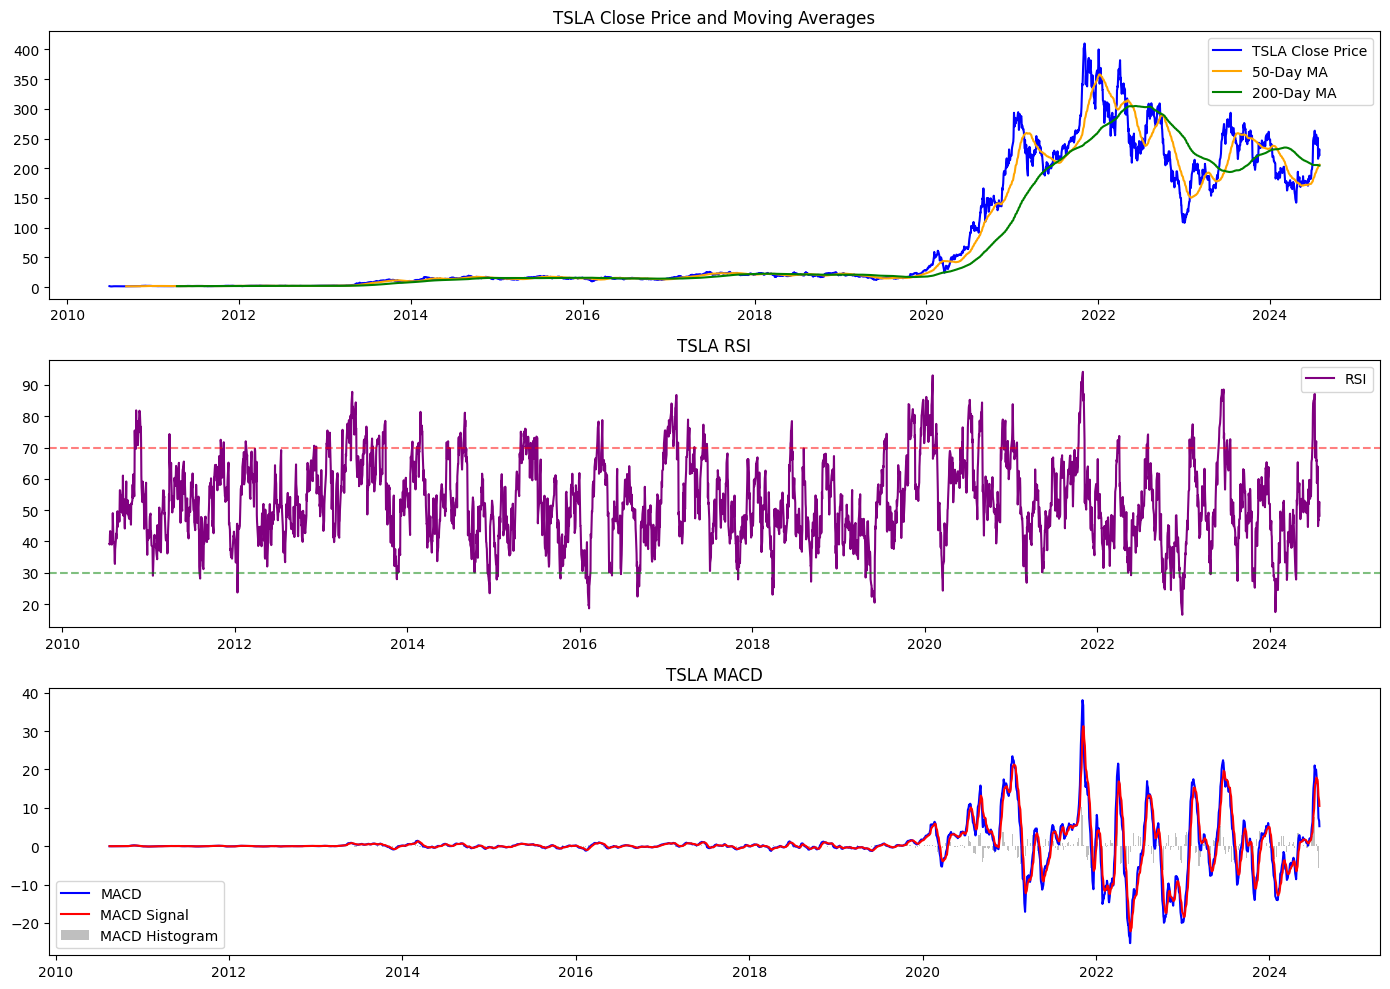

In [47]:
# Apply technical indicators
for stock_name, df in stock_data.items():
    df['MA50'] = talib.SMA(df['Close'], timeperiod=50)
    df['MA200'] = talib.SMA(df['Close'], timeperiod=200)
    df['RSI'] = talib.RSI(df['Close'], timeperiod=14)
    df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Example: Plotting the indicators for TSLA
plt.figure(figsize=(14, 10))

# Price and Moving Averages
plt.subplot(3, 1, 1)
plt.plot(stock_data['TSLA']['Close'], label='TSLA Close Price', color='blue')
plt.plot(stock_data['TSLA']['MA50'], label='50-Day MA', color='orange')
plt.plot(stock_data['TSLA']['MA200'], label='200-Day MA', color='green')
plt.title('TSLA Close Price and Moving Averages')
plt.legend()

# RSI
plt.subplot(3, 1, 2)
plt.plot(stock_data['TSLA']['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')
plt.axhline(30, linestyle='--', alpha=0.5, color='green')
plt.title('TSLA RSI')
plt.legend()

# MACD
plt.subplot(3, 1, 3)
plt.plot(stock_data['TSLA']['MACD'], label='MACD', color='blue')
plt.plot(stock_data['TSLA']['MACD_Signal'], label='MACD Signal', color='red')
plt.bar(stock_data['TSLA'].index, stock_data['TSLA']['MACD_Hist'], label='MACD Histogram', color='gray', alpha=0.5)
plt.title('TSLA MACD')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
 Calculate RSI for each stock
for stock_name, df in stock_data.items():
    df['RSI'] = talib.RSI(df['Close'], timeperiod=14)

# Plotting the RSI indicators for all stocks
plt.figure(figsize=(14, 8))

for stock_name, df in stock_data.items():
    plt.plot(df.index, df['RSI'], label=stock_name)

plt.axhline(70, linestyle='--', alpha=0.5, color='red', label='Overbought (70)')
plt.axhline(30, linestyle='--', alpha=0.5, color='green', label='Oversold (30)')
plt.title('RSI Indicators for Multiple Stocks')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.tight_layout()
plt.show()